In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.models import Sequential
from PIL import Image
import IPython.display as display
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.layers import LeakyReLU
from tensorflow.keras import layers
from keras.layers.normalization.batch_normalization import BatchNormalization

In [2]:
base_path = "../data/"
os.listdir(base_path)

['faces', 'vader']

In [3]:
classes = os.listdir(base_path)

###### Define the arrays

In [4]:
X_list=[]
y_list=[]
for class_ in classes:
    files=os.listdir(base_path+class_)
    for file in files:
        img=load_img(path=base_path+class_+'/'+f'{file}',target_size=(224,224))
        x=np.array(img)
        X_list.append(x)
        y_list.append(class_)

X=np.array(X_list)
y=np.array(y_list)

###### plotting the images

In [5]:
X[0].shape

(224, 224, 3)

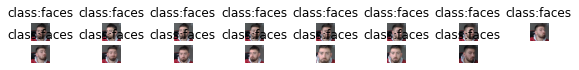

In [6]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(25, 8,i+1,title=f'class:{y[i]}')
    plt.imshow(X=X[i])
    plt.axis('off')

In [7]:
y_series = pd.Series(y).map({classes[0]:0, classes[1]:1})
y_series

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Length: 200, dtype: int64

In [8]:
y = to_categorical(y_series)

In [9]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [10]:
X

array([[[[ 80,  81,  83],
         [ 79,  82,  82],
         [ 80,  82,  81],
         ...,
         [ 89,  90, 101],
         [ 91,  90, 102],
         [ 91,  91, 101]],

        [[ 79,  80,  82],
         [ 79,  82,  82],
         [ 80,  82,  81],
         ...,
         [ 89,  92, 101],
         [ 92,  92, 102],
         [ 91,  92, 101]],

        [[ 79,  80,  82],
         [ 80,  81,  82],
         [ 81,  82,  83],
         ...,
         [ 89,  92, 101],
         [ 90,  93, 102],
         [ 90,  93, 101]],

        ...,

        [[163,  41,  62],
         [171,  49,  70],
         [176,  53,  74],
         ...,
         [131,  37,  52],
         [130,  36,  50],
         [129,  36,  50]],

        [[162,  40,  61],
         [169,  48,  68],
         [174,  52,  73],
         ...,
         [133,  37,  52],
         [131,  36,  51],
         [129,  34,  48]],

        [[165,  43,  65],
         [170,  48,  69],
         [175,  52,  73],
         ...,
         [133,  35,  50],
        

In [12]:
len(x)

224

In [13]:
X.shape

(200, 224, 224, 3)

In [14]:
y.shape

(200, 2)

###### LeNet5

In [28]:
K.clear_session()
model=Sequential([
    Conv2D(filters= 6, kernel_size=(5,5), strides=(1,1), input_shape=X[0].shape,
           activation=keras.activations.relu,
           padding='valid'), 
    
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'valid'),
    
    
    Conv2D(filters = 16, kernel_size=(5,5),strides=(1,1),
           activation=keras.activations.relu, 
           padding = 'valid'), 
    
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'valid'), 
    
    
    
    Flatten(),
    
    Dropout(0.2),
    Dense(units=120, activation=keras.activations.relu),
    BatchNormalization(),
      
    Dropout(0.2),
    Dense(units=84, activation=keras.activations.relu),
    BatchNormalization(),
    
    Dropout(0.2),
    Dense(units=2, activation=keras.activations.softmax)
    
])

In [29]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
              loss=keras.losses.Huber(delta=1.0, reduction="auto", name="huber_loss"),
              #loss=keras.losses.categorical_crossentropy,
              metrics=keras.metrics.Accuracy())

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 44944)             0         
                                                                 
 dropout (Dropout)           (None, 44944)             0

In [31]:
cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0005,
    patience=5,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=False,)

In [32]:
modelfix=model.fit(X,y,
          epochs=20,
          batch_size=10,
          validation_split=0.2,
          callbacks=[cb])

Epoch 1/20
16/16 [==============================] - 4s 198ms/step - loss: 0.0569 - accuracy: 0.0906 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
16/16 [==============================] - 3s 203ms/step - loss: 5.7407e-04 - accuracy: 0.3688 - val_loss: 0.0125 - val_accuracy: 0.9750
Epoch 3/20
16/16 [==============================] - 4s 250ms/step - loss: 2.1198e-07 - accuracy: 0.3906 - val_loss: 0.0125 - val_accuracy: 0.8750
Epoch 4/20
16/16 [==============================] - 4s 241ms/step - loss: 0.0336 - accuracy: 0.3438 - val_loss: 0.0000e+00 - val_accuracy: 0.9875
Epoch 5/20
16/16 [==============================] - 4s 243ms/step - loss: 0.0338 - accuracy: 0.4031 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
16/16 [==============================] - 4s 226ms/step - loss: 0.0061 - accuracy: 0.4563 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 00006: early stopping


<AxesSubplot:>

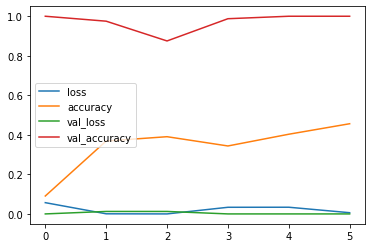

In [33]:
pd.DataFrame(modelfix.history).plot()

In [36]:
model.save("modelfix.h5")

### TransferLearn with pretrained Models

In [39]:
plt.rcParams['figure.figsize'] = (10, 10)

###### Instantiate a model

In [40]:
vgg_model=keras.applications.vgg16.VGG16(weights='imagenet')

In [41]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
vgg_model.layers

###### create base model

In [43]:
base_model=keras.applications.vgg16.VGG16(weights='imagenet',include_top=False)

In [44]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

###### Freeze some layers

In [45]:
for layers in base_model.layers[:]: 
    layers.trainable = False

###### unfreeze some again

In [46]:
unfreeze_layers = 6
for layers in base_model.layers[-unfreeze_layers:]:
    layers.trainable = True

###### train a logistic regression -> calculate feature vector

In [47]:
classes

['faces', 'vader']

In [48]:
out_features_vector = base_model.predict(X)
out_features_vector.shape

(200, 7, 7, 512)

###### flattern the feature vector

In [49]:
X_reshaped = out_features_vector.reshape((200,7*7*512))
X_reshaped.shape

(200, 25088)

###### train/test/split and train the model

In [50]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X_reshaped,y_series.values,
                                           test_size=.20,
                                          random_state=20)

In [51]:
log=LogisticRegression()

In [52]:
log.fit(Xtrain,ytrain)

LogisticRegression()

In [53]:
ypred_train=log.predict(Xtrain)
ypred_test=log.predict(Xtest)

In [54]:
ypred_train

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0], dtype=int64)

###### validation

In [55]:
score_train=cross_val_score(log,Xtrain,ytrain,cv=10)

In [56]:
score_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
print(f"accuracy train:{accuracy_score(ytrain,ypred_train)}")

accuracy train:1.0


In [58]:
print(f"accuracy train:{accuracy_score(ytest,ypred_test)}")

accuracy train:1.0
